#Preprocessing Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import tensorflow.keras as keras
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from tensorflow.keras.optimizers import Adam, SGD, Adagrad, RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
import pickle as p
import glob
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Input, Masking

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, SimpleRNN, Masking, Input, Activation
from tensorflow.keras.activations import softmax
import tensorflow as tf

In [ ]:
path = "/content/drive/MyDrive/Handwriting_Data01"
os.listdir(path)

['chA', 'tA', 'bA', 'ai', 'dA']

In [ ]:
def read_data(path):
    tr_path = path+'/train/'
    test_path = path+'/dev/'
    train = pd.concat([pd.read_csv(tr_path+i, sep=" ", header=None) for i in os.listdir(tr_path)])
    test = pd.concat([pd.read_csv(test_path+i, sep=" ", header=None) for i in os.listdir(test_path)])
    return train, test

In [ ]:
tr_ai, test_ai= read_data(path+'/ai')
tr_bA, test_bA= read_data(path+'/bA')
tr_chA, test_chA= read_data(path+'/chA')
tr_dA, test_dA= read_data(path+'/dA')
tr_tA, test_tA= read_data(path+'/tA')

In [ ]:
tr_bA

,0,1,2,3,4,5,6,7,8,9,...,310,311,312,313,314,315,316,317,318,319
0,24,0.288079,0.331788,0.274834,0.345033,0.314570,0.384768,0.341060,0.371523,0.321192,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,87,0.354305,0.192715,0.347682,0.192715,0.347682,0.199338,0.347682,0.205960,0.347682,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,69,0.533113,0.146358,0.526490,0.139735,0.519868,0.139735,0.513245,0.139735,0.506623,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,68,0.440397,0.225828,0.433775,0.225828,0.427152,0.225828,0.427152,0.232450,0.427152,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,79,0.380795,0.205960,0.374172,0.205960,0.374172,0.219205,0.367550,0.232450,0.367550,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,62,0.327815,0.338411,0.321192,0.338411,0.307947,0.338411,0.288079,0.345033,0.268212,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,101,0.433775,0.345033,0.440397,0.351656,0.440397,0.345033,0.427152,0.331788,0.420530,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,116,0.268212,0.364901,0.261589,0.364901,0.261589,0.358278,0.248344,0.358278,0.241722,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,118,0.314570,0.126490,0.307947,0.126490,0.301325,0.126490,0.288079,0.126490,0.281457,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
tr_chA.drop(0, inplace=True, axis=1)
tr_dA.drop(0, inplace=True, axis=1)
tr_ai.drop(0, inplace=True, axis=1)
tr_bA.drop(0, inplace=True, axis=1)
tr_tA.drop(0, inplace=True, axis=1)

In [ ]:
test_chA.drop(0, inplace=True, axis=1)
test_dA.drop(0, inplace=True, axis=1)
test_ai.drop(0, inplace=True, axis=1)
test_bA.drop(0, inplace=True, axis=1)
test_tA.drop(0, inplace=True, axis=1)

In [ ]:
tr_ai=tr_ai.dropna(axis=1,how='all')
test_ai=test_ai.dropna(axis=1,how='all')
tr_bA=tr_bA.dropna(axis=1,how='all')
test_bA=test_bA.dropna(axis=1,how='all')
tr_chA=tr_chA.dropna(axis=1,how='all')
test_chA=test_chA.dropna(axis=1,how='all')
tr_dA=tr_dA.dropna(axis=1,how='all')
test_dA=test_dA.dropna(axis=1,how='all')
tr_tA=tr_tA.dropna(axis=1,how='all')
test_tA=test_tA.dropna(axis=1,how='all')

In [ ]:
#import pandas as pd
tr_data = pd.concat([tr_chA, tr_tA, tr_ai, tr_bA, tr_dA])
test_data = pd.concat([test_chA, test_tA, test_ai, test_bA, test_dA])
# save to training.csv file
#tr_data.to_csv('training.csv', index=False)

In [ ]:
nan_list=[np.nan]*test_data.shape[0]
nan_list

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

In [ ]:
for i in range(test_data.shape[1],tr_data.shape[1]+1):
    test_data[i]=nan_list

In [ ]:
tr_data=tr_data.replace(np.nan,0)
test_data=test_data.replace(np.nan,0)

In [ ]:
df =tr_data
# Create an empty list to store the x, y point pairs
tr = []


# Loop over each row in the DataFrame
for index, row in df.iterrows():
    # Create a list to store the x, y pairs for this row
    point_row = []
    
    
    # Loop over each value in the row, skipping the first column
    for i in range(1, len(row), 2):
        # Get the x, y pair for this point
        x = row[i]
        y = row[i+1]
        l=[]
        #print(type(x))
        l.append(x)
        l.append(y)
        l=np.array(l,dtype=np.float32)
        # Add the x, y pair to the list for this row
        point_row.append(l)
    
    # Add the list of x, y pairs for this row to the points list
    tr.append(point_row)

# Create a new DataFrame from the points list
train = pd.DataFrame(tr)

# Save the new DataFrame to a CSV file
#df_points.to_csv('testHw.csv', index=False, header=False)

In [ ]:
df =test_data
# Create an empty list to store the x, y point pairs
tst = []


# Loop over each row in the DataFrame
for index, row in df.iterrows():
    # Create a list to store the x, y pairs for this row
    point_row = []
    
    
    # Loop over each value in the row, skipping the first column
    for i in range(1, len(row), 2):
        # Get the x, y pair for this point
        x = row[i]
        y = row[i+1]
        l=[]
        #print(type(x))
        l.append(x)
        l.append(y)
        l=np.array(l,dtype=np.float32)
        # Add the x, y pair to the list for this row
        point_row.append(l)
    
    # Add the list of x, y pairs for this row to the points list
    tst.append(point_row)

# Create a new DataFrame from the points list
test = pd.DataFrame(tst)

# Save the new DataFrame to a CSV file
#df_points.to_csv('testHw.csv', index=False, header=False)

import pandas as pd
label = []
for i in range(len(test_ai)):
    label.append('ai')
for i in range(len(test_bA)):
    label.append('bA')
for i in range(len(test_chA)):
    label.append('chA')
for i in range(len(test_dA)):
    label.append('dA')
for i in range(len(test_tA)):
    label.append('tA')

label_df = pd.DataFrame({'label': label})
label_df['label_index'] = label_df['label'].replace({'ai': 0, 'bA': 1, 'chA': 2, 'dA': 3, 'tA': 4})
label_df.to_csv('/content/drive/MyDrive/Test_label1.csv', index=False)

In [ ]:
# Load the CSV file into a pandas DataFrame
trainLabel = pd.read_csv('/content/drive/MyDrive/label1 (1).csv')

# Drop a specific label (column)
trainLabel = trainLabel.drop('label', axis=1)


# Save the modified DataFrame back to a new CSV file
#trainLabel.to_csv('/content/drive/MyDrive/modified_file_train.csv', index=False)

In [ ]:
# Load the CSV file into a pandas DataFrame
Test_label = pd.read_csv('/content/drive/MyDrive/Test_label1.csv')

# Drop a specific label (column)
Test_label = Test_label.drop('label', axis=1)

In [ ]:
yt=trainLabel.values
ytest=Test_label.values

In [ ]:
tensortest=tf.convert_to_tensor(tst)

In [ ]:
tensortrain=tf.convert_to_tensor(tr)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard

In [ ]:
es1= EarlyStopping(monitor='loss',min_delta=0.0001, patience=20,verbose=1)

In [ ]:
mask_value=0.0
model1 = Sequential()
model1.add(Masking(mask_value=mask_value, input_shape=(161, 2)))
model1.add(SimpleRNN(units=64,return_sequences=True))
model1.add(Dropout(0.2))
#model.add(SimpleRNN(units=64,return_sequences=True))
#model.add(Dropout(0.2))
model1.add(SimpleRNN(units=64))
model1.add(Dense(units=5, activation='softmax'))
model1.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
model1.summary()
history1=model1.fit(tensortrain, yt, callbacks=[es1],epochs=1000, batch_size=128)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 masking_2 (Masking)         (None, 161, 2)            0         
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, 161, 64)           4288      
                                                                 
 dropout_2 (Dropout)         (None, 161, 64)           0         
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 5)                 325       
                                                                 
Total params: 12,869
Trainable params: 12,869
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
3/3 [==============================] 

In [ ]:
model1.save('/content/drive/MyDrive/model11.h5')

In [ ]:
#Evaluating the model
print('\nEvaluation of model on train data:')
trainAcc1=model1.evaluate(x=tensortrain,y=yt,batch_size=1, verbose="auto",callbacks=None)
print(model1.metrics_names)
print(trainAcc1)
print('\nEvaluation of model on test data:')
testAcc1=model1.evaluate(x=tensortest, y=ytest, batch_size=1, verbose="auto",callbacks=None)
print(model1.metrics_names)
print(testAcc1)
print('\nPredictions for test data:')
testProb1=model1.predict(tensortest, batch_size=1, verbose="auto", callbacks=None)
pred1=np.argmax(testProb1,axis=1)
confusionMatrix1=tf.math.confusion_matrix(ytest,pred1)
print(confusionMatrix1)


Evaluation of model on train data:
345/345 [==============================] - 7s 22ms/step - loss: 0.4898 - accuracy: 0.8203
['loss', 'accuracy']
[0.4898185431957245, 0.8202898502349854]

Evaluation of model on test data:
100/100 [==============================] - 2s 15ms/step - loss: 0.4959 - accuracy: 0.7900
['loss', 'accuracy']
[0.4958617687225342, 0.7900000214576721]

Predictions for test data:
100/100 [==============================] - 1s 15ms/step
tf.Tensor(
[[15  2  0  3  0]
 [ 0 17  0  3  0]
 [ 0  0 20  0  0]
 [ 9  2  0  9  0]
 [ 0  1  0  1 18]], shape=(5, 5), dtype=int32)


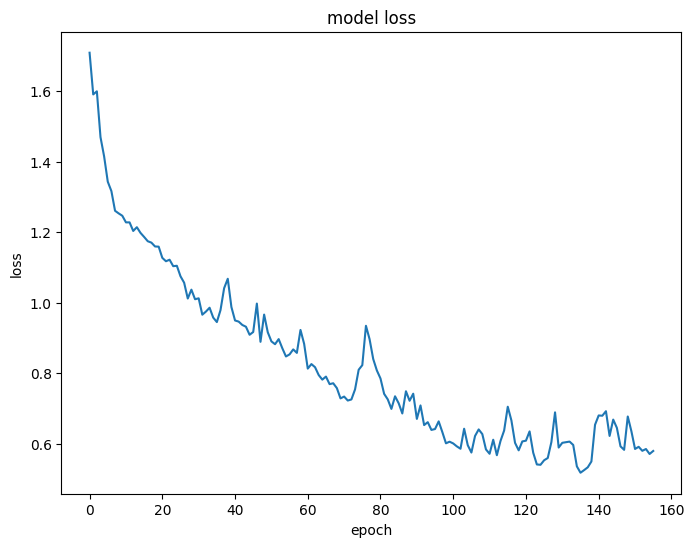

In [ ]:
plt.figure(figsize=(8, 6))
#plt.plot(history8.history['accuracy'])
plt.plot(history1.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
es2= EarlyStopping(monitor='loss',min_delta=0.0001, patience=20,verbose=1)

In [ ]:
mask_value=0.0
model2 = Sequential()
model2.add(Masking(mask_value=mask_value, input_shape=(161, 2)))
model2.add(SimpleRNN(units=32,return_sequences=True))
model2.add(Dropout(0.2))
#model.add(SimpleRNN(units=64,return_sequences=True))
#model.add(Dropout(0.2))
model2.add(SimpleRNN(units=32))
model2.add(Dense(units=5, activation='softmax'))
model2.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
model2.summary()
history2=model2.fit(tensortrain, yt, callbacks=[es2],epochs=1000, batch_size=128)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 masking_4 (Masking)         (None, 161, 2)            0         
                                                                 
 simple_rnn_8 (SimpleRNN)    (None, 161, 32)           1120      
                                                                 
 dropout_4 (Dropout)         (None, 161, 32)           0         
                                                                 
 simple_rnn_9 (SimpleRNN)    (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 5)                 165       
                                                                 
Total params: 3,365
Trainable params: 3,365
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
3/3 [==============================] - 

In [ ]:
model2.save('/content/drive/MyDrive/model2.h5')

In [ ]:
#Evaluating the model
print('\nEvaluation of model on train data:')
trainAcc2=model2.evaluate(x=tensortrain,y=yt,batch_size=1, verbose="auto",callbacks=None)
print(model2.metrics_names)
print(trainAcc2)
print('\nEvaluation of model on test data:')
testAcc2=model2.evaluate(x=tensortest, y=ytest, batch_size=1, verbose="auto",callbacks=None)
print(model2.metrics_names)
print(testAcc2)
print('\nPredictions for test data:')
testProb2=model2.predict(tensortest, batch_size=1, verbose="auto", callbacks=None)
pred2=np.argmax(testProb2,axis=1)
confusionMatrix2=tf.math.confusion_matrix(ytest,pred2)
print(confusionMatrix2)


Evaluation of model on train data:
345/345 [==============================] - 10s 27ms/step - loss: 0.6716 - accuracy: 0.6899
['loss', 'accuracy']
[0.6716177463531494, 0.6898550987243652]

Evaluation of model on test data:
100/100 [==============================] - 2s 15ms/step - loss: 0.6274 - accuracy: 0.6700
['loss', 'accuracy']
[0.6273571848869324, 0.6700000166893005]

Predictions for test data:
100/100 [==============================] - 2s 14ms/step
tf.Tensor(
[[18  0  0  2  0]
 [ 2  1  0  0 17]
 [ 0  0 20  0  0]
 [12  0  0  8  0]
 [ 0  0  0  0 20]], shape=(5, 5), dtype=int32)


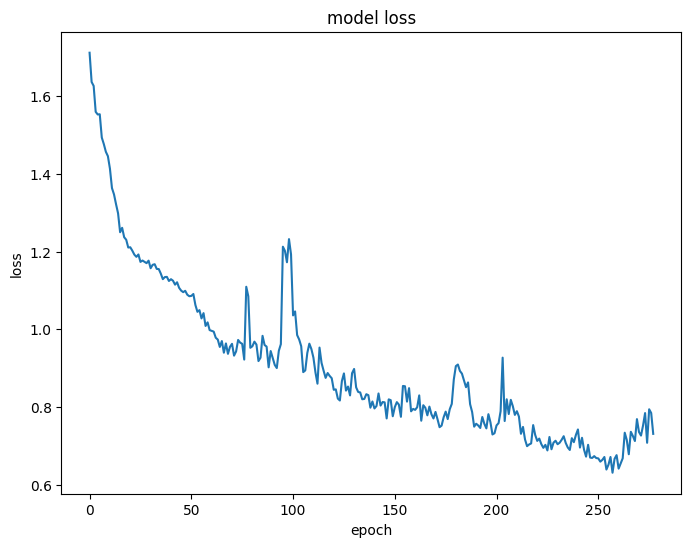

In [ ]:
plt.figure(figsize=(8, 6))
#plt.plot(history8.history['accuracy'])
plt.plot(history2.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
es3= EarlyStopping(monitor='loss',min_delta=0.0001, patience=20,verbose=1)

In [ ]:
mask_value=0.0
model3 = Sequential()
model3.add(Masking(mask_value=mask_value, input_shape=(161, 2)))
model3.add(SimpleRNN(units=128,return_sequences=True))
model3.add(Dropout(0.2))
#model.add(SimpleRNN(units=64,return_sequences=True))
#model.add(Dropout(0.2))
model3.add(SimpleRNN(units=128))
model3.add(Dense(units=5, activation='softmax'))
model3.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
model3.summary()
history3=model3.fit(tensortrain, yt, callbacks=[es3],epochs=1000, batch_size=128)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 masking_6 (Masking)         (None, 161, 2)            0         
                                                                 
 simple_rnn_12 (SimpleRNN)   (None, 161, 128)          16768     
                                                                 
 dropout_6 (Dropout)         (None, 161, 128)          0         
                                                                 
 simple_rnn_13 (SimpleRNN)   (None, 128)               32896     
                                                                 
 dense_6 (Dense)             (None, 5)                 645       
                                                                 
Total params: 50,309
Trainable params: 50,309
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
3/3 [==============================] 

In [ ]:
model3.save('/content/drive/MyDrive/model3.h5')

In [ ]:
#Evaluating the model
print('\nEvaluation of model on train data:')
trainAcc3=model3.evaluate(x=tensortrain,y=yt,batch_size=1, verbose="auto",callbacks=None)
print(model3.metrics_names)
print(trainAcc3)
print('\nEvaluation of model on test data:')
testAcc3=model3.evaluate(x=tensortest, y=ytest, batch_size=1, verbose="auto",callbacks=None)
print(model3.metrics_names)
print(testAcc3)
print('\nPredictions for test data:')
testProb3=model3.predict(tensortest, batch_size=1, verbose="auto", callbacks=None)
pred3=np.argmax(testProb3,axis=1)
confusionMatrix3=tf.math.confusion_matrix(ytest,pred3)
print(confusionMatrix3)


Evaluation of model on train data:
345/345 [==============================] - 6s 16ms/step - loss: 0.6258 - accuracy: 0.7362
['loss', 'accuracy']
[0.6257519125938416, 0.7362318634986877]

Evaluation of model on test data:
100/100 [==============================] - 3s 33ms/step - loss: 0.6102 - accuracy: 0.7500
['loss', 'accuracy']
[0.6102470755577087, 0.75]

Predictions for test data:
100/100 [==============================] - 3s 30ms/step
tf.Tensor(
[[12  0  0  7  1]
 [ 2 13  0  0  5]
 [ 0  0 20  0  0]
 [ 8  1  0 10  1]
 [ 0  0  0  0 20]], shape=(5, 5), dtype=int32)


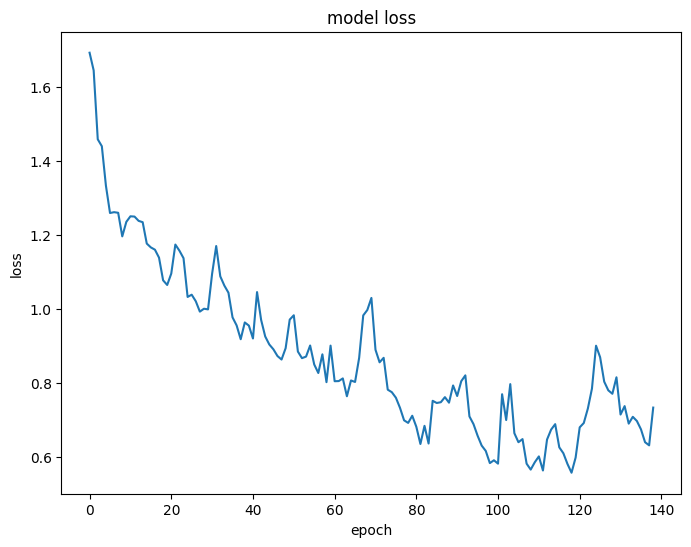

In [ ]:
plt.figure(figsize=(8, 6))
#plt.plot(history8.history['accuracy'])
plt.plot(history3.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
mask_value=0.0
model31 = Sequential()
model31.add(Masking(mask_value=mask_value, input_shape=(161, 2)))
model31.add(SimpleRNN(units=128,return_sequences=True))
#model31.add(Dropout(0.2))
#model.add(SimpleRNN(units=64,return_sequences=True))
#model.add(Dropout(0.2))
model31.add(SimpleRNN(units=128))
model31.add(Dense(units=5, activation='softmax'))
model31.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
model31.summary()
history31=model31.fit(tensortrain, yt, callbacks=[es3],epochs=1000, batch_size=128)

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 masking_16 (Masking)        (None, 161, 2)            0         
                                                                 
 simple_rnn_16 (SimpleRNN)   (None, 161, 128)          16768     
                                                                 
 simple_rnn_17 (SimpleRNN)   (None, 128)               32896     
                                                                 
 dense_16 (Dense)            (None, 5)                 645       
                                                                 
Total params: 50,309
Trainable params: 50,309
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
3/3 [==============================] - 3s 338ms/step - loss: 1.7704 - accuracy: 0.1942
Epoch 2/1000
3/3 [==============================] - 1s 341ms/step - loss: 1.6741 

In [ ]:
model31.save('/content/drive/MyDrive/model31.h5')

In [ ]:
#Evaluating the model
print('\nEvaluation of model on train data:')
trainAcc31=model31.evaluate(x=tensortrain,y=yt,batch_size=1, verbose="auto",callbacks=None)
print(model31.metrics_names)
print(trainAcc31)
print('\nEvaluation of model on test data:')
testAcc31=model31.evaluate(x=tensortest, y=ytest, batch_size=1, verbose="auto",callbacks=None)
print(model31.metrics_names)
print(testAcc31)
print('\nPredictions for test data:')
testProb31=model31.predict(tensortest, batch_size=1, verbose="auto", callbacks=None)
pred31=np.argmax(testProb31,axis=1)
confusionMatrix31=tf.math.confusion_matrix(ytest,pred31)
print(confusionMatrix31)


Evaluation of model on train data:
345/345 [==============================] - 8s 21ms/step - loss: 1.0891 - accuracy: 0.5188
['loss', 'accuracy']
[1.0891152620315552, 0.5188405513763428]

Evaluation of model on test data:
100/100 [==============================] - 2s 17ms/step - loss: 0.9495 - accuracy: 0.6300
['loss', 'accuracy']
[0.9495250582695007, 0.6299999952316284]

Predictions for test data:
100/100 [==============================] - 3s 26ms/step
tf.Tensor(
[[ 6  4  0  9  1]
 [ 1 12  0  3  4]
 [ 0  0 20  0  0]
 [ 0  6  1 11  2]
 [ 0  5  0  1 14]], shape=(5, 5), dtype=int32)


In [ ]:
plt.figure(figsize=(8, 6))
#plt.plot(history8.history['accuracy'])
plt.plot(history31.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
es6= EarlyStopping(monitor='loss',min_delta=0.0001, patience=20,verbose=1)

In [ ]:
mask_value=0.0
model6 = Sequential()
model6.add(Masking(mask_value=mask_value, input_shape=(161, 2)))
model6.add(LSTM(units=32,return_sequences=True))
model6.add(Dropout(0.2))
#model.add(LSTM(units=32,return_sequences=True))
#model.add(Dropout(0.2))
model6.add(LSTM(units=32))
#model.add(Dropout(0.2))
model6.add(Dense(units=5, activation='softmax'))
model6.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
model6.summary()
history6=model6.fit(tensortrain, yt, callbacks=[es6],epochs=1000, batch_size=128)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 masking_7 (Masking)         (None, 161, 2)            0         
                                                                 
 lstm (LSTM)                 (None, 161, 32)           4480      
                                                                 
 dropout_7 (Dropout)         (None, 161, 32)           0         
                                                                 
 lstm_1 (LSTM)               (None, 32)                8320      
                                                                 
 dense_7 (Dense)             (None, 5)                 165       
                                                                 
Total params: 12,965
Trainable params: 12,965
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
3/3 [==============================] 

In [ ]:
model6.save('/content/drive/MyDrive/model6.h5')

In [ ]:
#Evaluating the model
print('\nEvaluation of model on train data:')
trainAcc6=model6.evaluate(x=tensortrain,y=yt,batch_size=1, verbose="auto",callbacks=None)
print(model6.metrics_names)
print(trainAcc6)
print('\nEvaluation of model on test data:')
testAcc6=model6.evaluate(x=tensortest, y=ytest, batch_size=1, verbose="auto",callbacks=None)
print(model6.metrics_names)
print(testAcc6)
print('\nPredictions for test data:')
testProb6=model6.predict(tensortest, batch_size=1, verbose="auto", callbacks=None)
pred6=np.argmax(testProb6,axis=1)
confusionMatrix6=tf.math.confusion_matrix(ytest,pred6)
print(confusionMatrix6)


Evaluation of model on train data:
345/345 [==============================] - 12s 28ms/step - loss: 0.7238 - accuracy: 0.6899
['loss', 'accuracy']
[0.7238209843635559, 0.6898550987243652]

Evaluation of model on test data:
100/100 [==============================] - 2s 22ms/step - loss: 0.8780 - accuracy: 0.5500
['loss', 'accuracy']
[0.8779858350753784, 0.550000011920929]

Predictions for test data:
100/100 [==============================] - 4s 21ms/step
tf.Tensor(
[[10  0  0 10  0]
 [ 3  7  0  2  8]
 [ 0  0 20  0  0]
 [ 7  1  1 11  0]
 [ 7  6  0  0  7]], shape=(5, 5), dtype=int32)


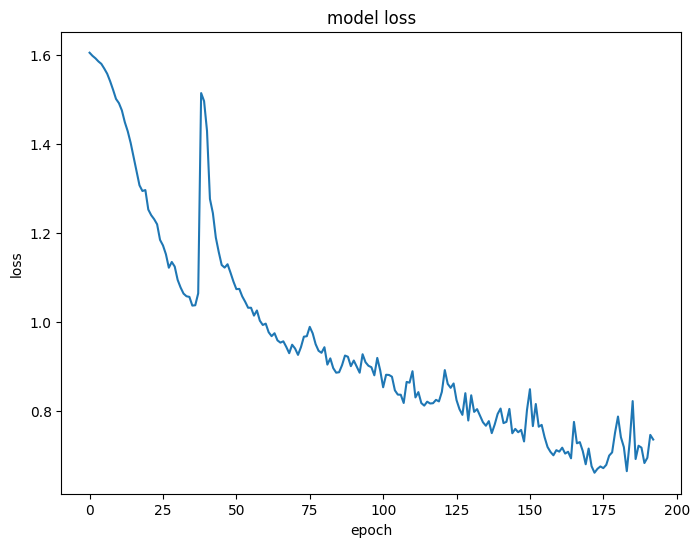

In [ ]:
plt.figure(figsize=(8, 6))
#plt.plot(history8.history['accuracy'])
plt.plot(history6.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
es7= EarlyStopping(monitor='loss',min_delta=0.0001, patience=20,verbose=1)

In [ ]:
mask_value=0.0
model7 = Sequential()
model7.add(Masking(mask_value=mask_value, input_shape=(161, 2)))
model7.add(LSTM(units=64,return_sequences=True))
model7.add(Dropout(0.2))
#model.add(LSTM(units=32,return_sequences=True))
#model.add(Dropout(0.2))
model7.add(LSTM(units=64))
#model.add(Dropout(0.2))
model7.add(Dense(units=5, activation='softmax'))
model7.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
model7.summary()
history7=model7.fit(tensortrain, yt, callbacks=[es6],epochs=1000, batch_size=128)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 masking_9 (Masking)         (None, 161, 2)            0         
                                                                 
 lstm_4 (LSTM)               (None, 161, 64)           17152     
                                                                 
 dropout_9 (Dropout)         (None, 161, 64)           0         
                                                                 
 lstm_5 (LSTM)               (None, 64)                33024     
                                                                 
 dense_9 (Dense)             (None, 5)                 325       
                                                                 
Total params: 50,501
Trainable params: 50,501
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
3/3 [==============================] 

In [ ]:
model7.save('/content/drive/MyDrive/model7.h5')

In [ ]:
#Evaluating the model
print('\nEvaluation of model on train data:')
trainAcc7=model7.evaluate(x=tensortrain,y=yt,batch_size=1, verbose="auto",callbacks=None)
print(model7.metrics_names)
print(trainAcc7)
print('\nEvaluation of model on test data:')
testAcc7=model7.evaluate(x=tensortest, y=ytest, batch_size=1, verbose="auto",callbacks=None)
print(model7.metrics_names)
print(testAcc7)
print('\nPredictions for test data:')
testProb7=model7.predict(tensortest, batch_size=1, verbose="auto", callbacks=None)
pred7=np.argmax(testProb7,axis=1)
confusionMatrix7=tf.math.confusion_matrix(ytest,pred7)
print(confusionMatrix7)


Evaluation of model on train data:
345/345 [==============================] - 12s 28ms/step - loss: 0.5404 - accuracy: 0.7739
['loss', 'accuracy']
[0.5404363870620728, 0.7739130258560181]

Evaluation of model on test data:
100/100 [==============================] - 2s 23ms/step - loss: 0.6819 - accuracy: 0.6400
['loss', 'accuracy']
[0.6819279193878174, 0.6399999856948853]

Predictions for test data:
100/100 [==============================] - 4s 23ms/step
tf.Tensor(
[[13  0  0  7  0]
 [ 1  5  0  0 14]
 [ 0  0 20  0  0]
 [ 8  2  0 10  0]
 [ 1  3  0  0 16]], shape=(5, 5), dtype=int32)


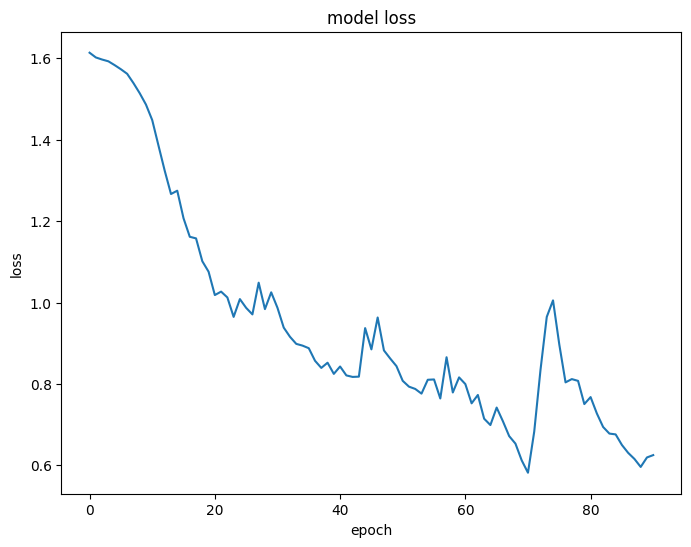

In [ ]:
plt.figure(figsize=(8, 6))
#plt.plot(history8.history['accuracy'])
plt.plot(history7.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
es8= EarlyStopping(monitor='loss',min_delta=0.0001, patience=20,verbose=1)

In [ ]:
mask_value=0.0
model8 = Sequential()
model8.add(Masking(mask_value=mask_value, input_shape=(161, 2)))
model8.add(LSTM(units=128,return_sequences=True))
model8.add(Dropout(0.2))
#model.add(LSTM(units=32,return_sequences=True))
#model.add(Dropout(0.2))
model8.add(LSTM(units=128))
#model.add(Dropout(0.2))
model8.add(Dense(units=5, activation='softmax'))
model8.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
model8.summary()
history8=model8.fit(tensortrain, yt, callbacks=[es8],epochs=1000, batch_size=128)

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 masking_13 (Masking)        (None, 161, 2)            0         
                                                                 
 lstm_10 (LSTM)              (None, 161, 128)          67072     
                                                                 
 dropout_11 (Dropout)        (None, 161, 128)          0         
                                                                 
 lstm_11 (LSTM)              (None, 128)               131584    
                                                                 
 dense_13 (Dense)            (None, 5)                 645       
                                                                 
Total params: 199,301
Trainable params: 199,301
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
3/3 [=============================

In [ ]:
model8.save('/content/drive/MyDrive/model8.h5')

In [ ]:
#Evaluating the model
print('\nEvaluation of model on train data:')
trainAcc8=model8.evaluate(x=tensortrain,y=yt,batch_size=1, verbose="auto",callbacks=None)
print(model8.metrics_names)
print(trainAcc8)
print('\nEvaluation of model on test data:')
testAcc8=model8.evaluate(x=tensortest, y=ytest, batch_size=1, verbose="auto",callbacks=None)
print(model8.metrics_names)
print(testAcc8)
print('\nPredictions for test data:')
testProb8=model8.predict(tensortest, batch_size=1, verbose="auto", callbacks=None)
pred8=np.argmax(testProb8,axis=1)
confusionMatrix8=tf.math.confusion_matrix(ytest,pred8)
print(confusionMatrix8)


Evaluation of model on train data:
345/345 [==============================] - 14s 36ms/step - loss: 0.2212 - accuracy: 0.9043
['loss', 'accuracy']
[0.2212129682302475, 0.904347836971283]

Evaluation of model on test data:
100/100 [==============================] - 3s 32ms/step - loss: 0.6931 - accuracy: 0.7200
['loss', 'accuracy']
[0.6930602788925171, 0.7200000286102295]

Predictions for test data:
100/100 [==============================] - 7s 43ms/step
tf.Tensor(
[[ 9  4  0  6  1]
 [ 0 11  0  0  9]
 [ 0  0 20  0  0]
 [ 2  4  0 14  0]
 [ 2  0  0  0 18]], shape=(5, 5), dtype=int32)


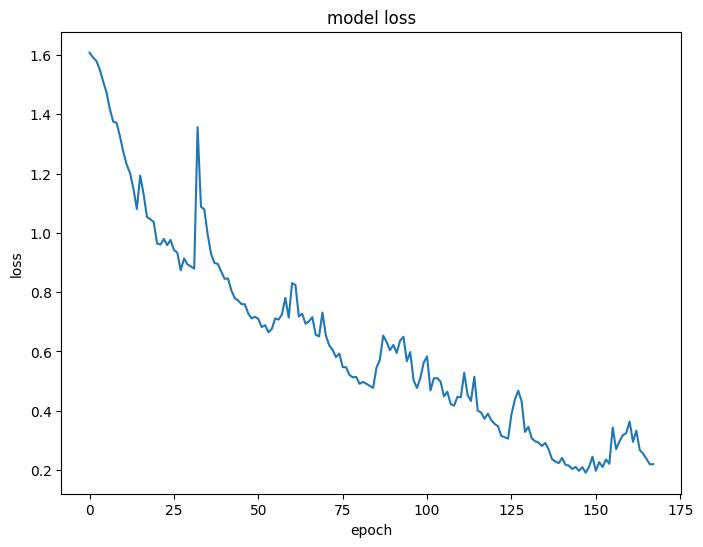

In [ ]:
plt.figure(figsize=(8, 6))
#plt.plot(history8.history['accuracy'])
plt.plot(history8.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
es9= EarlyStopping(monitor='loss',min_delta=0.0001, patience=35,verbose=1)
model9 = Sequential()
model9.add(Masking(mask_value=mask_value, input_shape=(161, 2)))
model9.add(LSTM(units=64,dropout=0.2))
model9.add(Dense(units=5, activation='softmax'))
model9.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
model9.summary()
history9=model9.fit(tensortrain, yt, epochs=1000,callbacks=[es1], batch_size=128)

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 masking_14 (Masking)        (None, 161, 2)            0         
                                                                 
 lstm_12 (LSTM)              (None, 64)                17152     
                                                                 
 dense_14 (Dense)            (None, 5)                 325       
                                                                 
Total params: 17,477
Trainable params: 17,477
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
3/3 [==============================] - 5s 194ms/step - loss: 1.6119 - accuracy: 0.1681
Epoch 2/1000
3/3 [==============================] - 1s 347ms/step - loss: 1.6029 - accuracy: 0.1884
Epoch 3/1000
3/3 [==============================] - 1s 362ms/step - loss: 1.5992 - accuracy: 0.2000
Epoch 4/1000


In [ ]:
model9.save('/content/drive/MyDrive/model9.h5')

In [ ]:
#Evaluating the model
print('\nEvaluation of model on train data:')
trainAcc9=model9.evaluate(x=tensortrain,y=yt,batch_size=1, verbose="auto",callbacks=None)
print(model9.metrics_names)
print(trainAcc9)
print('\nEvaluation of model on test data:')
testAcc9=model9.evaluate(x=tensortest, y=ytest, batch_size=1, verbose="auto",callbacks=None)
print(model9.metrics_names)
print(testAcc9)
print('\nPredictions for test data:')
testProb9=model9.predict(tensortest, batch_size=1, verbose="auto", callbacks=None)
pred9=np.argmax(testProb9,axis=1)
confusionMatrix9=tf.math.confusion_matrix(ytest,pred9)
print(confusionMatrix9)


Evaluation of model on train data:
345/345 [==============================] - 5s 13ms/step - loss: 0.9646 - accuracy: 0.5565
['loss', 'accuracy']
[0.964592695236206, 0.5565217137336731]

Evaluation of model on test data:
100/100 [==============================] - 1s 13ms/step - loss: 0.9364 - accuracy: 0.6000
['loss', 'accuracy']
[0.9363961219787598, 0.6000000238418579]

Predictions for test data:
100/100 [==============================] - 3s 19ms/step
tf.Tensor(
[[14  0  0  6  0]
 [ 4 13  0  0  3]
 [ 0  0 18  2  0]
 [ 6  1  0 13  0]
 [10  7  0  1  2]], shape=(5, 5), dtype=int32)


In [ ]:
mask_value=0.0
model = Sequential()
model.add(Masking(mask_value=mask_value, input_shape=(161, 2)))
model.add(LSTM(units=64,return_sequences=True))
model.add(Dropout(0.2))
#model.add(LSTM(units=32,return_sequences=True))
#model.add(Dropout(0.2))
model.add(LSTM(units=64))
#model.add(Dropout(0.2))
model.add(Dense(units=5, activation='softmax'))
model.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
model.summary()
history=model.fit(tensortrain, yt, callbacks=[es6],epochs=1000, batch_size=128)

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 masking_14 (Masking)        (None, 161, 2)            0         
                                                                 
 lstm_4 (LSTM)               (None, 161, 64)           17152     
                                                                 
 dropout_5 (Dropout)         (None, 161, 64)           0         
                                                                 
 lstm_5 (LSTM)               (None, 64)                33024     
                                                                 
 dense_14 (Dense)            (None, 5)                 325       
                                                                 
Total params: 50,501
Trainable params: 50,501
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
3/3 [==============================]

In [ ]:
model.save('/content/drive/MyDrive/model6.h5')

In [ ]:
es7= EarlyStopping(monitor='loss',min_delta=0.0001, patience=20,verbose=1)

In [ ]:
mask_value=0.0
model = Sequential()
model.add(Masking(mask_value=mask_value, input_shape=(161, 2)))
model.add(LSTM(units=128,return_sequences=True))
model.add(Dropout(0.2))
#model.add(LSTM(units=32,return_sequences=True))
#model.add(Dropout(0.2))
model.add(LSTM(units=128))
#model.add(Dropout(0.2))
model.add(Dense(units=5, activation='softmax'))
model.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
model.summary()
history=model.fit(tensortrain, yt, callbacks=[es7],epochs=1000, batch_size=128)

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 masking_15 (Masking)        (None, 161, 2)            0         
                                                                 
 lstm_6 (LSTM)               (None, 161, 128)          67072     
                                                                 
 dropout_6 (Dropout)         (None, 161, 128)          0         
                                                                 
 lstm_7 (LSTM)               (None, 128)               131584    
                                                                 
 dense_15 (Dense)            (None, 5)                 645       
                                                                 
Total params: 199,301
Trainable params: 199,301
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
3/3 [=============================

In [ ]:
model.save('/content/drive/MyDrive/model7.h5')

In [ ]:
#Evaluating the model
print('\nEvaluation of model on train data:')
trainAcc=model.evaluate(x=tensortrain,y=yt,batch_size=1, verbose="auto",callbacks=None)
print(model.metrics_names)
print(trainAcc)
print('\nEvaluation of model on test data:')
testAcc=model.evaluate(x=tensortest, y=ytest, batch_size=1, verbose="auto",callbacks=None)
print(model.metrics_names)
print(testAcc)
print('\nPredictions for test data:')
testProb=model.predict(tensortest, batch_size=1, verbose="auto", callbacks=None)
pred=np.argmax(testProb,axis=1)
confusionMatrix=tf.math.confusion_matrix(ytest,pred)
print(confusionMatrix)


Evaluation of model on train data:
345/345 [==============================] - 18s 44ms/step - loss: 0.3565 - accuracy: 0.8319
['loss', 'accuracy']
[0.3564629852771759, 0.8318840861320496]

Evaluation of model on test data:
100/100 [==============================] - 4s 35ms/step - loss: 0.4127 - accuracy: 0.8300
['loss', 'accuracy']
[0.41274920105934143, 0.8299999833106995]

Predictions for test data:
100/100 [==============================] - 7s 48ms/step
tf.Tensor(
[[15  0  1  4  0]
 [ 0 20  0  0  0]
 [ 0  0 20  0  0]
 [ 8  0  1 11  0]
 [ 1  2  0  0 17]], shape=(5, 5), dtype=int32)


In [ ]:
from tensorflow import keras
# Load the model from the .h5 file
model7 = keras.models.load_model('/content/drive/MyDrive/model7.h5')

In [ ]:
#Evaluating the model
print('\nEvaluation of model on train data:')
trainAcc=model7.evaluate(x=tensortrain,y=yt,batch_size=1, verbose="auto",callbacks=None)
print(model7.metrics_names)
print(trainAcc)
print('\nEvaluation of model on test data:')
testAcc=model7.evaluate(x=tensortest, y=ytest, batch_size=1, verbose="auto",callbacks=None)
print(model7.metrics_names)
print(testAcc)
print('\nPredictions for test data:')
testProb=model7.predict(tensortest, batch_size=1, verbose="auto", callbacks=None)
pred=np.argmax(testProb,axis=1)
confusionMatrix=tf.math.confusion_matrix(ytest,pred)
print(confusionMatrix)


Evaluation of model on train data:
345/345 [==============================] - 17s 40ms/step - loss: 0.3565 - accuracy: 0.8319
['loss', 'accuracy']
[0.3564629852771759, 0.8318840861320496]

Evaluation of model on test data:
100/100 [==============================] - 4s 37ms/step - loss: 0.4127 - accuracy: 0.8300
['loss', 'accuracy']
[0.41274920105934143, 0.8299999833106995]

Predictions for test data:
100/100 [==============================] - 6s 34ms/step
tf.Tensor(
[[15  0  1  4  0]
 [ 0 20  0  0  0]
 [ 0  0 20  0  0]
 [ 8  0  1 11  0]
 [ 1  2  0  0 17]], shape=(5, 5), dtype=int32)


In [ ]:
#Evaluating the model
print('\nEvaluation of model on train data:')
trainAcc=model.evaluate(x=tensortrain,y=yt,batch_size=128, verbose="auto",callbacks=None)
print(model.metrics_names)
print(trainAcc)


Evaluation of model on train data:
3/3 [==============================] - 6s 638ms/step - loss: 0.3565 - accuracy: 0.8319
['loss', 'accuracy']
[0.3564630150794983, 0.8318840861320496]


In [ ]:
es1= EarlyStopping(monitor='loss',min_delta=0.0001, patience=20,verbose=1)

In [ ]:
mask_value=0.0
model = Sequential()
model.add(Masking(mask_value=mask_value, input_shape=(161, 2)))
model.add(SimpleRNN(units=64,return_sequences=True))
#model.add(SimpleRNN(units=32,return_sequences=True))
model.add(SimpleRNN(units=64))
model.add(Dense(units=5, activation='softmax'))
model.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
model.summary()
history=model.fit(tensortrain, yt, callbacks=[es1],epochs=200, batch_size=128)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 masking_3 (Masking)         (None, 161, 2)            0         
                                                                 
 simple_rnn_6 (SimpleRNN)    (None, 161, 64)           4288      
                                                                 
 simple_rnn_7 (SimpleRNN)    (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 5)                 325       
                                                                 
Total params: 12,869
Trainable params: 12,869
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
3/3 [==============================] - 3s 186ms/step - loss: 1.6914 - accuracy: 0.1884
Epoch 2/200
3/3 [==============================] - 1s 182ms/step - loss: 1.5918 - a

In [ ]:
model.save('/content/drive/MyDrive/model2.h5')

In [ ]:
es2= EarlyStopping(monitor='loss',min_delta=0.0001, patience=20,verbose=1)

In [ ]:
mask_value=0.0
model = Sequential()
model.add(Masking(mask_value=mask_value, input_shape=(161, 2)))
model.add(SimpleRNN(units=128,return_sequences=True))
#model.add(SimpleRNN(units=32,return_sequences=True))
model.add(SimpleRNN(units=128))
model.add(Dense(units=5, activation='softmax'))
model.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
model.summary()
history=model.fit(tensortrain, yt, callbacks=[es2],epochs=200, batch_size=128)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 masking_5 (Masking)         (None, 161, 2)            0         
                                                                 
 simple_rnn_10 (SimpleRNN)   (None, 161, 128)          16768     
                                                                 
 simple_rnn_11 (SimpleRNN)   (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 5)                 645       
                                                                 
Total params: 50,309
Trainable params: 50,309
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
3/3 [==============================] - 4s 395ms/step - loss: 1.7043 - accuracy: 0.2203
Epoch 2/200
3/3 [==============================] - 2s 722ms/step - loss: 1.6572 - a

In [ ]:
model.save('/content/drive/MyDrive/model3.h5')

In [ ]:
es2= EarlyStopping(monitor='loss',min_delta=0.0001, patience=20,verbose=1)

4/4 [==============================] - 0s 20ms/step - loss: 0.7060 - accuracy: 0.6700


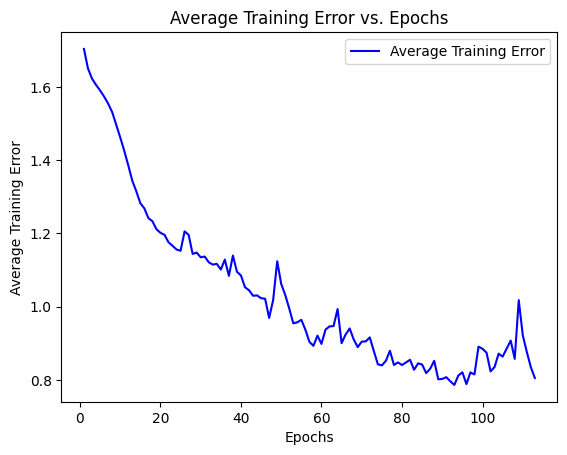

In [ ]:
model.evaluate(tensortrain,yt)

model.evaluate(tensortest,yTest)


# Extract the loss values from the history object
training_loss = history.history['loss']

# Plot the training loss against epochs
epochs = range(1, len(training_loss) + 1)
plt.plot(epochs, training_loss, 'b', label='Average Training Error')
plt.xlabel('Epochs')
plt.ylabel('Average Training Error')
plt.title('Average Training Error vs. Epochs')
plt.legend()
plt.show()



Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 masking_9 (Masking)         (None, 161, 2)            0         
                                                                 
 lstm (LSTM)                 (None, 161, 32)           4480      
                                                                 
 dropout_17 (Dropout)        (None, 161, 32)           0         
                                                                 
 lstm_1 (LSTM)               (None, 161, 32)           8320      
                                                                 
 dropout_18 (Dropout)        (None, 161, 32)           0         
                                                                 
 lstm_2 (LSTM)               (None, 32)                8320      
                                                                 
 dropout_19 (Dropout)        (None, 32)              

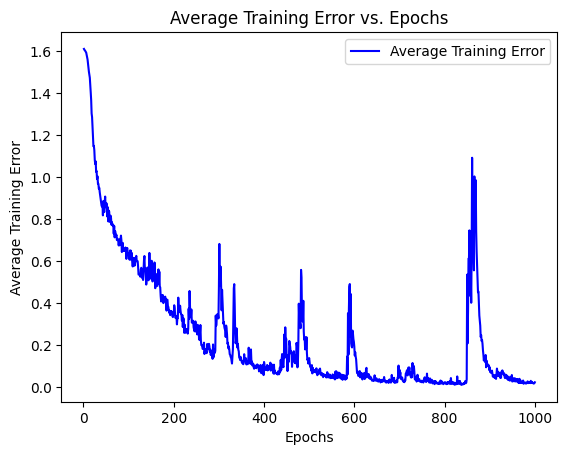

In [ ]:
mask_value=0.0
model = Sequential()
model.add(Masking(mask_value=mask_value, input_shape=(161, 2)))
model.add(LSTM(units=32,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=32,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=32))
model.add(Dropout(0.2))
model.add(Dense(units=5, activation='softmax'))
model.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
model.summary()
history=model.fit(tensortrain, yt, epochs=1000, batch_size=128)

#model evaluation
model.evaluate(tensortrain,yt)

model.evaluate(tensortest,yTest)


# Extract the loss values from the history object
training_loss = history.history['loss']

# Plot the training loss against epochs
epochs = range(1, len(training_loss) + 1)
plt.plot(epochs, training_loss, 'b', label='Average Training Error')
plt.xlabel('Epochs')
plt.ylabel('Average Training Error')
plt.title('Average Training Error vs. Epochs')
plt.legend()
plt.show()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_18 (SimpleRNN)   (None, 161, 161)          26404     
                                                                 
 dropout_9 (Dropout)         (None, 161, 161)          0         
                                                                 
 simple_rnn_19 (SimpleRNN)   (None, 161, 161)          52003     
                                                                 
 dropout_10 (Dropout)        (None, 161, 161)          0         
                                                                 
 simple_rnn_20 (SimpleRNN)   (None, 161)               52003     
                                                                 
 dense_6 (Dense)             (None, 5)                 810       
                                                                 
Total params: 131,220
Trainable params: 131,220
Non-tr

Exception ignored in: <function _xla_gc_callback at 0x7f55b1a0d360>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 97, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


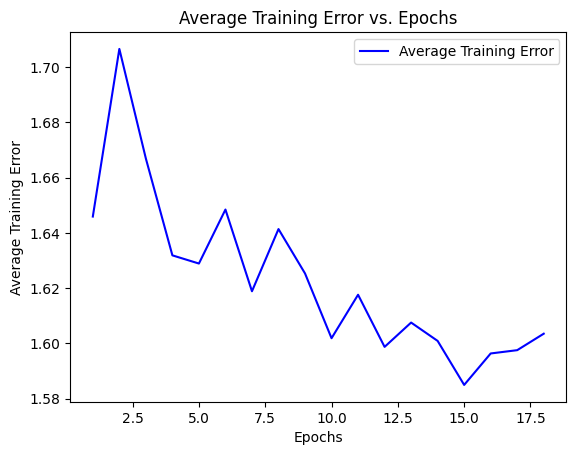

In [ ]:
es= EarlyStopping(monitor='loss',min_delta=0.0001, patience=3,verbose=1)
model01 = Sequential()
model01.add(SimpleRNN(161,activation='relu',input_shape=(161, 2), return_sequences=True))
model01.add(Dropout(0.2))
model01.add(SimpleRNN(161,  return_sequences=True))
model01.add(Dropout(0.2))
model01.add(SimpleRNN(161))
model01.add(Dense(5,activation='softmax'))
model01.summary()

model01.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics = ['accuracy'])
history01=model01.fit(tensortrain, yt, epochs=500,batch_size=128,callbacks=[es], verbose=1)



#Save Model and Model Structure
model01.save('/content/drive/MyDrive/DLA6/hw_Save_Model/RNN_HW1.h5')
f=open('/content/drive/MyDrive/DLA6/hw_Save_Model/RNN_HW1.pckl','wb')
p.dump(history01.history,f)
f.close()

# Extract the loss values from the history object
training_loss = history01.history['loss']

# Plot the training loss against epochs
epochs = range(1, len(training_loss) + 1)
plt.plot(epochs, training_loss, 'b', label='Average Training Error')
plt.xlabel('Epochs')
plt.ylabel('Average Training Error')
plt.title('Average Training Error vs. Epochs')
plt.legend()
plt.show()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_13 (SimpleRNN)   (None, 161, 161)          26404     
                                                                 
 simple_rnn_14 (SimpleRNN)   (None, 161, 161)          52003     
                                                                 
 simple_rnn_15 (SimpleRNN)   (None, 161)               52003     
                                                                 
 dense_5 (Dense)             (None, 5)                 810       
                                                                 
Total params: 131,220
Trainable params: 131,220
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
3/3 [==============================] - 6s 602ms/step - loss: 1.6500 - accuracy: 0.1913
Epoch 2/500
3/3 [==============================] - 2s 560ms/step - loss: 1.6852 -

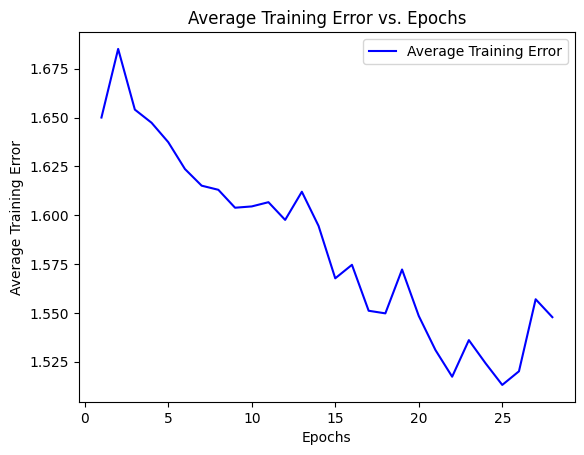

In [ ]:
es= EarlyStopping(monitor='loss',min_delta=0.0001, patience=3,verbose=1)
model01 = Sequential()
model01.add(SimpleRNN(161,activation='relu',input_shape=(161, 2), return_sequences=True))
#model01.add(Dropout(0.2))
model01.add(SimpleRNN(161,  return_sequences=True))
#model01.add(Dropout(0.2))
model01.add(SimpleRNN(161))
model01.add(Dense(5,activation='softmax'))
model01.summary()

model01.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics = ['accuracy'])
history01=model01.fit(tensortrain, yt, epochs=500,batch_size=128,callbacks=[es], verbose=1)



#Save Model and Model Structure
model01.save('/content/drive/MyDrive/DLA6/hw_Save_Model/RNN_HW2.h5')
f=open('/content/drive/MyDrive/DLA6/hw_Save_Model/RNN_HW2.pckl','wb')
p.dump(history01.history,f)
f.close()

# Extract the loss values from the history object
training_loss = history01.history['loss']

# Plot the training loss against epochs
epochs = range(1, len(training_loss) + 1)
plt.plot(epochs, training_loss, 'b', label='Average Training Error')
plt.xlabel('Epochs')
plt.ylabel('Average Training Error')
plt.title('Average Training Error vs. Epochs')
plt.legend()
plt.show()


Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_37 (SimpleRNN)   (None, 161, 161)          26404     
                                                                 
 simple_rnn_38 (SimpleRNN)   (None, 161, 161)          52003     
                                                                 
 simple_rnn_39 (SimpleRNN)   (None, 161)               52003     
                                                                 
 dense_13 (Dense)            (None, 5)                 810       
                                                                 
Total params: 131,220
Trainable params: 131,220
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
3/3 [==============================] - 4s 576ms/step - loss: 1.6094 - accuracy: 0.2029
Epoch 2/500
3/3 [==============================] - 2s 579ms/step - loss: 1.6064 

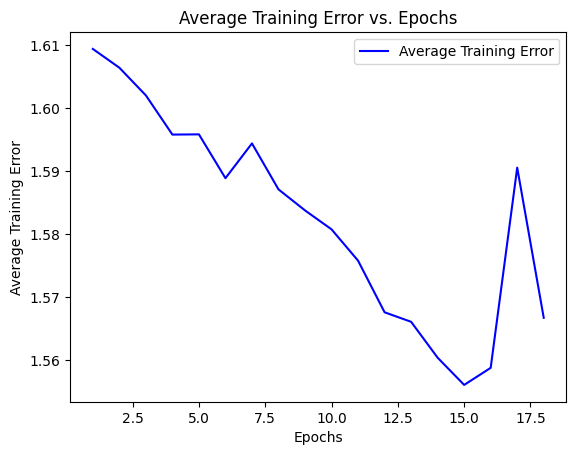

In [ ]:
es= EarlyStopping(monitor='loss',min_delta=0.001, patience=3,verbose=1)
model01 = Sequential()
model01.add(SimpleRNN(161,activation='relu',input_shape=(161, 2), return_sequences=True))
#model01.add(Dropout(0.2))
model01.add(SimpleRNN(161,  activation='relu',return_sequences=True))
#model01.add(Dropout(0.2))
model01.add(SimpleRNN(161,activation='relu'))
model01.add(Dense(5,activation='softmax'))
model01.summary()

model01.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics = ['accuracy'])
history01=model01.fit(tensortrain, yt, epochs=500,batch_size=128,callbacks=[es], verbose=1)



#Save Model and Model Structure
model01.save('/content/drive/MyDrive/DLA6/hw_Save_Model/RNN_HW8.h5')
f=open('/content/drive/MyDrive/DLA6/hw_Save_Model/RNN_HW8.pckl','wb')
p.dump(history01.history,f)
f.close()

# Extract the loss values from the history object
training_loss = history01.history['loss']

# Plot the training loss against epochs
epochs = range(1, len(training_loss) + 1)
plt.plot(epochs, training_loss, 'b', label='Average Training Error')
plt.xlabel('Epochs')
plt.ylabel('Average Training Error')
plt.title('Average Training Error vs. Epochs')
plt.legend()
plt.show()

In [ ]:
model01 = Sequential()
model01.add(SimpleRNN(161,activation='relu',input_shape=(161, 2), return_sequences=True))
#model01.add(Dropout(0.2))
model01.add(SimpleRNN(161, activation='relu', return_sequences=True))
#model01.add(Dropout(0.2))
model01.add(SimpleRNN(161,activation='relu'))
model01.add(Dense(5,activation='softmax'))
model01.summary()

model01.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics = ['accuracy'])
history01=model01.fit(tensortrain, yt, epochs=500,batch_size=128, verbose=1)

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_55 (SimpleRNN)   (None, 161, 161)          26404     
                                                                 
 simple_rnn_56 (SimpleRNN)   (None, 161, 161)          52003     
                                                                 
 simple_rnn_57 (SimpleRNN)   (None, 161)               52003     
                                                                 
 dense_19 (Dense)            (None, 5)                 810       
                                                                 
Total params: 131,220
Trainable params: 131,220
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
3/3 [==============================] - 5s 574ms/step - loss: 1.6104 - accuracy: 0.2232
Epoch 2/500
3/3 [==============================] - 2s 573ms/step - loss: 1.6049 

In [ ]:
model01 = Sequential()
model01.add(SimpleRNN(161,activation='relu',input_shape=(161, 2), return_sequences=True))
#model01.add(Dropout(0.2))
model01.add(SimpleRNN(161, activation='relu', return_sequences=True))
#model01.add(Dropout(0.2))
model01.add(SimpleRNN(161,activation='relu'))
model01.add(Dense(5,activation='softmax'))
model01.summary()

model01.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics = ['accuracy'])
history01=model01.fit(tensortrain, yt, epochs=1500,batch_size=128, verbose=1)

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_58 (SimpleRNN)   (None, 161, 161)          26404     
                                                                 
 simple_rnn_59 (SimpleRNN)   (None, 161, 161)          52003     
                                                                 
 simple_rnn_60 (SimpleRNN)   (None, 161)               52003     
                                                                 
 dense_20 (Dense)            (None, 5)                 810       
                                                                 
Total params: 131,220
Trainable params: 131,220
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1500
3/3 [==============================] - 5s 566ms/step - loss: 1.6091 - accuracy: 0.2000
Epoch 2/1500
3/3 [==============================] - 2s 570ms/step - loss: 1.603

In [ ]:
model01 = Sequential()
model01.add(SimpleRNN(161,activation='relu',input_shape=(161, 2), return_sequences=True))
model01.add(Dropout(0.2))
model01.add(SimpleRNN(161, activation='relu', return_sequences=True))
model01.add(Dropout(0.2))
model01.add(SimpleRNN(161,activation='relu'))
model01.add(Dense(5,activation='softmax'))
model01.summary()

model01.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics = ['accuracy'])
history01=model01.fit(tensortrain, yt, epochs=500,batch_size=32,callbacks=[es], verbose=1)

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_52 (SimpleRNN)   (None, 161, 161)          26404     
                                                                 
 dropout_12 (Dropout)        (None, 161, 161)          0         
                                                                 
 simple_rnn_53 (SimpleRNN)   (None, 161, 161)          52003     
                                                                 
 dropout_13 (Dropout)        (None, 161, 161)          0         
                                                                 
 simple_rnn_54 (SimpleRNN)   (None, 161)               52003     
                                                                 
 dense_18 (Dense)            (None, 5)                 810       
                                                                 
Total params: 131,220
Trainable params: 131,220
Non-t

In [ ]:
model01 = Sequential()
model01.add(SimpleRNN(256,activation='relu',input_shape=(161, 2), return_sequences=True))
#model01.add(Dropout(0.2))
model01.add(SimpleRNN(256, activation='relu', return_sequences=True))
#model01.add(Dropout(0.2))
model01.add(SimpleRNN(256,activation='relu'))
model01.add(Dense(5,activation='softmax'))
model01.summary()

model01.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics = ['accuracy'])
history01=model01.fit(tensortrain, yt, epochs=5000,batch_size=128, verbose=1)

Streaming output truncated to the last 5000 lines.
3/3 [==============================] - 4s 1s/step - loss: 1.3780 - accuracy: 0.4145
Epoch 405/5000
3/3 [==============================] - 3s 991ms/step - loss: 1.3676 - accuracy: 0.3913
Epoch 406/5000
3/3 [==============================] - 3s 977ms/step - loss: 1.3783 - accuracy: 0.3710
Epoch 407/5000
3/3 [==============================] - 3s 1s/step - loss: 1.4153 - accuracy: 0.3855
Epoch 408/5000
3/3 [==============================] - 5s 1s/step - loss: 1.3739 - accuracy: 0.4145
Epoch 409/5000
3/3 [==============================] - 3s 955ms/step - loss: 1.3620 - accuracy: 0.4058
Epoch 410/5000
3/3 [==============================] - 3s 970ms/step - loss: 1.5092 - accuracy: 0.3130
Epoch 411/5000
3/3 [==============================] - 3s 1s/step - loss: 1.4596 - accuracy: 0.3739
Epoch 412/5000
3/3 [==============================] - 5s 1s/step - loss: 1.4558 - accuracy: 0.3594
Epoch 413/5000
3/3 [==============================] - 3s 1s/s

KeyboardInterrupt: ignored

In [ ]:
model01 = Sequential()
model01.add(SimpleRNN(161,activation='relu',input_shape=(161, 2), return_sequences=True))
#model01.add(Dropout(0.2))
model01.add(SimpleRNN(161, activation='relu', return_sequences=True))
#model01.add(Dropout(0.2))
model01.add(SimpleRNN(161,activation='relu'))
model01.add(Dense(5,activation='softmax'))
model01.summary()

model01.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics = ['accuracy'])
history01=model01.fit(tensortrain, yt, epochs=500,batch_size=32,callbacks=[es], verbose=1)

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_49 (SimpleRNN)   (None, 161, 161)          26404     
                                                                 
 simple_rnn_50 (SimpleRNN)   (None, 161, 161)          52003     
                                                                 
 simple_rnn_51 (SimpleRNN)   (None, 161)               52003     
                                                                 
 dense_17 (Dense)            (None, 5)                 810       
                                                                 
Total params: 131,220
Trainable params: 131,220
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
11/11 [==============================] - 5s 210ms/step - loss: 1.6103 - accuracy: 0.1739
Epoch 2/500
11/11 [==============================] - 3s 318ms/step - loss: 1.6

In [ ]:
model01 = Sequential()
model01.add(SimpleRNN(161,activation='relu',input_shape=(161, 2), return_sequences=True))
#model01.add(Dropout(0.2))
model01.add(SimpleRNN(161, activation='relu', return_sequences=True))
#model01.add(Dropout(0.2))
model01.add(SimpleRNN(161,activation='relu'))
model01.add(Dense(5,activation='softmax'))
model01.summary()

model01.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics = ['accuracy'])
history01=model01.fit(tensortrain, yt, epochs=500,batch_size=161,callbacks=[es], verbose=1)

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_46 (SimpleRNN)   (None, 161, 161)          26404     
                                                                 
 simple_rnn_47 (SimpleRNN)   (None, 161, 161)          52003     
                                                                 
 simple_rnn_48 (SimpleRNN)   (None, 161)               52003     
                                                                 
 dense_16 (Dense)            (None, 5)                 810       
                                                                 
Total params: 131,220
Trainable params: 131,220
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
3/3 [==============================] - 6s 480ms/step - loss: 1.6104 - accuracy: 0.2000
Epoch 2/500
3/3 [==============================] - 2s 479ms/step - loss: 1.6080 

In [ ]:
es= EarlyStopping(monitor='loss',min_delta=0.0001, patience=5,verbose=1)
model01 = Sequential()
model01.add(SimpleRNN(161,activation='relu',input_shape=(161, 2), return_sequences=True))
#model01.add(Dropout(0.2))
model01.add(SimpleRNN(161, activation='relu', return_sequences=True))
#model01.add(Dropout(0.2))
model01.add(SimpleRNN(161,activation='relu'))
model01.add(Dense(5,activation='softmax'))
model01.summary()

model01.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics = ['accuracy'])
history01=model01.fit(tensortrain, yt, epochs=500,batch_size=64,callbacks=[es], verbose=1)


Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_40 (SimpleRNN)   (None, 161, 161)          26404     
                                                                 
 simple_rnn_41 (SimpleRNN)   (None, 161, 161)          52003     
                                                                 
 simple_rnn_42 (SimpleRNN)   (None, 161)               52003     
                                                                 
 dense_14 (Dense)            (None, 5)                 810       
                                                                 
Total params: 131,220
Trainable params: 131,220
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
6/6 [==============================] - 5s 382ms/step - loss: 1.6113 - accuracy: 0.1797
Epoch 2/500
6/6 [==============================] - 2s 379ms/step - loss: 1.6077 

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_31 (SimpleRNN)   (None, 161, 161)          26404     
                                                                 
 simple_rnn_32 (SimpleRNN)   (None, 161, 161)          52003     
                                                                 
 simple_rnn_33 (SimpleRNN)   (None, 161)               52003     
                                                                 
 dense_11 (Dense)            (None, 5)                 810       
                                                                 
Total params: 131,220
Trainable params: 131,220
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
3/3 [==============================] - 6s 613ms/step - loss: 1.7376 - accuracy: 0.1797
Epoch 2/500
3/3 [==============================] - 2s 596ms/step - loss: 1.7293 

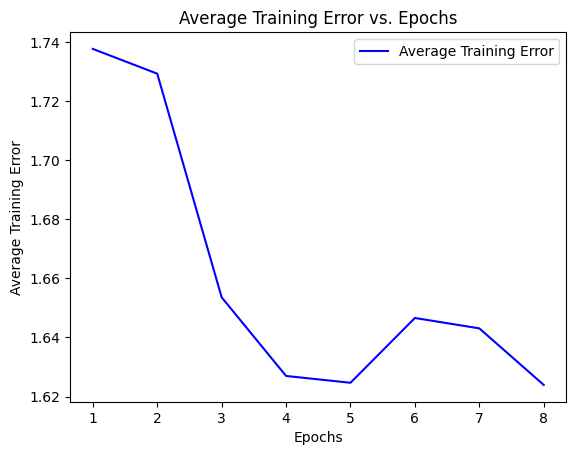

In [ ]:
es= EarlyStopping(monitor='loss',min_delta=0.001, patience=3,verbose=1)
model01 = Sequential()
model01.add(SimpleRNN(161,activation='relu',input_shape=(161, 2), return_sequences=True))
#model01.add(Dropout(0.2))
model01.add(SimpleRNN(161,  return_sequences=True))
#model01.add(Dropout(0.2))
model01.add(SimpleRNN(161))
model01.add(Dense(5,activation='softmax'))
model01.summary()

model01.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics = ['accuracy'])
history01=model01.fit(tensortrain, yt, epochs=500,batch_size=128,callbacks=[es], verbose=1)



#Save Model and Model Structure
model01.save('/content/drive/MyDrive/DLA6/hw_Save_Model/RNN_HW3.h5')
f=open('/content/drive/MyDrive/DLA6/hw_Save_Model/RNN_HW3.pckl','wb')
p.dump(history01.history,f)
f.close()

# Extract the loss values from the history object
training_loss = history01.history['loss']

# Plot the training loss against epochs
epochs = range(1, len(training_loss) + 1)
plt.plot(epochs, training_loss, 'b', label='Average Training Error')
plt.xlabel('Epochs')
plt.ylabel('Average Training Error')
plt.title('Average Training Error vs. Epochs')
plt.legend()
plt.show()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_34 (SimpleRNN)   (None, 161, 161)          26404     
                                                                 
 simple_rnn_35 (SimpleRNN)   (None, 161, 161)          52003     
                                                                 
 simple_rnn_36 (SimpleRNN)   (None, 161)               52003     
                                                                 
 dense_12 (Dense)            (None, 5)                 810       
                                                                 
Total params: 131,220
Trainable params: 131,220
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
3/3 [==============================] - 4s 585ms/step - loss: 1.7866 - accuracy: 0.1942
Epoch 2/500
3/3 [==============================] - 2s 592ms/step - loss: 1.7572 

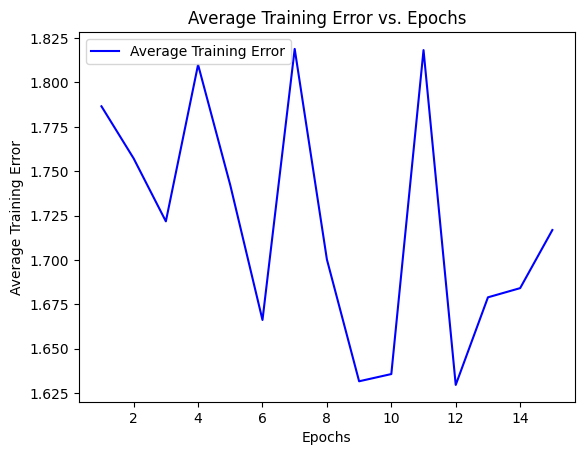

In [ ]:
es= EarlyStopping(monitor='loss',min_delta=0.001, patience=3,verbose=1)
model01 = Sequential()
model01.add(SimpleRNN(161,input_shape=(161, 2), return_sequences=True))
#model01.add(Dropout(0.2))
model01.add(SimpleRNN(161,  return_sequences=True))
#model01.add(Dropout(0.2))
model01.add(SimpleRNN(161))
model01.add(Dense(5,activation='softmax'))
model01.summary()

model01.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics = ['accuracy'])
history01=model01.fit(tensortrain, yt, epochs=500,batch_size=128,callbacks=[es], verbose=1)



#Save Model and Model Structure
model01.save('/content/drive/MyDrive/DLA6/hw_Save_Model/RNN_HW7.h5')
f=open('/content/drive/MyDrive/DLA6/hw_Save_Model/RNN_HW7.pckl','wb')
p.dump(history01.history,f)
f.close()

# Extract the loss values from the history object
training_loss = history01.history['loss']

# Plot the training loss against epochs
epochs = range(1, len(training_loss) + 1)
plt.plot(epochs, training_loss, 'b', label='Average Training Error')
plt.xlabel('Epochs')
plt.ylabel('Average Training Error')
plt.title('Average Training Error vs. Epochs')
plt.legend()
plt.show()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_25 (SimpleRNN)   (None, 161, 161)          26404     
                                                                 
 simple_rnn_26 (SimpleRNN)   (None, 161, 161)          52003     
                                                                 
 simple_rnn_27 (SimpleRNN)   (None, 161)               52003     
                                                                 
 dense_9 (Dense)             (None, 5)                 810       
                                                                 
Total params: 131,220
Trainable params: 131,220
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
6/6 [==============================] - 5s 380ms/step - loss: 1.6787 - accuracy: 0.2145
Epoch 2/500
6/6 [==============================] - 2s 381ms/step - loss: 1.6737 -

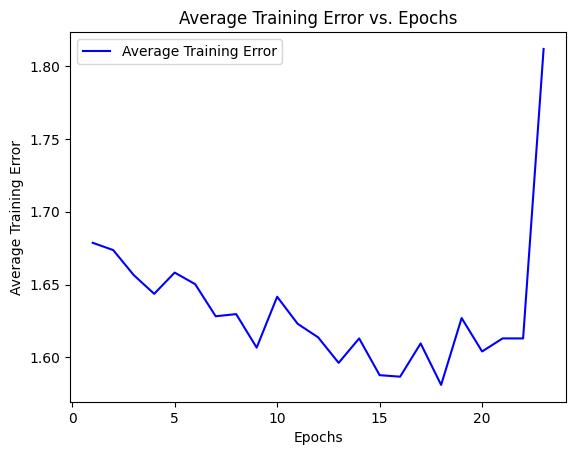

In [ ]:
es= EarlyStopping(monitor='loss',min_delta=0.0001, patience=5,verbose=1)
model01 = Sequential()
model01.add(SimpleRNN(161,activation='relu',input_shape=(161, 2), return_sequences=True))
#model01.add(Dropout(0.2))
model01.add(SimpleRNN(161,  return_sequences=True))
#model01.add(Dropout(0.2))
model01.add(SimpleRNN(161))
model01.add(Dense(5,activation='softmax'))
model01.summary()

model01.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics = ['accuracy'])
history01=model01.fit(tensortrain, yt, epochs=500,batch_size=64,callbacks=[es], verbose=1)



#Save Model and Model Structure
model01.save('/content/drive/MyDrive/DLA6/hw_Save_Model/RNN_HW4.h5')
f=open('/content/drive/MyDrive/DLA6/hw_Save_Model/RNN_HW4.pckl','wb')
p.dump(history01.history,f)
f.close()

# Extract the loss values from the history object
training_loss = history01.history['loss']

# Plot the training loss against epochs
epochs = range(1, len(training_loss) + 1)
plt.plot(epochs, training_loss, 'b', label='Average Training Error')
plt.xlabel('Epochs')
plt.ylabel('Average Training Error')
plt.title('Average Training Error vs. Epochs')
plt.legend()
plt.show()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_28 (SimpleRNN)   (None, 161, 161)          26404     
                                                                 
 simple_rnn_29 (SimpleRNN)   (None, 161, 161)          52003     
                                                                 
 simple_rnn_30 (SimpleRNN)   (None, 161)               52003     
                                                                 
 dense_10 (Dense)            (None, 5)                 810       
                                                                 
Total params: 131,220
Trainable params: 131,220
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
6/6 [==============================] - 6s 716ms/step - loss: 1.7922 - accuracy: 0.2087
Epoch 2/500
6/6 [==============================] - 3s 373ms/step - loss: 1.7283 

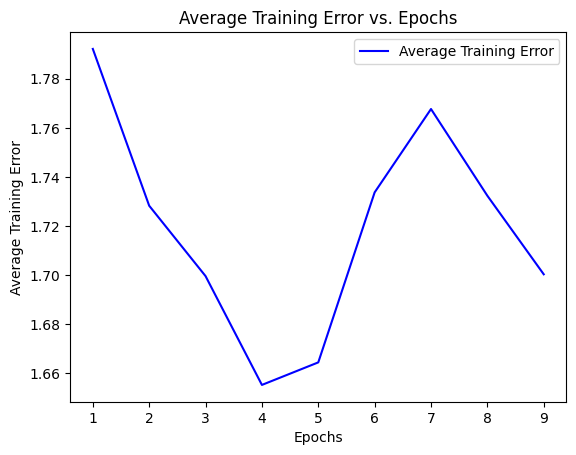

In [ ]:
es= EarlyStopping(monitor='loss',min_delta=0.0001, patience=5,verbose=1)
model01 = Sequential()
model01.add(SimpleRNN(161,input_shape=(161, 2), return_sequences=True))
#model01.add(Dropout(0.2))
model01.add(SimpleRNN(161,  return_sequences=True))
#model01.add(Dropout(0.2))
model01.add(SimpleRNN(161))
model01.add(Dense(5,activation='softmax'))
model01.summary()

model01.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics = ['accuracy'])
history01=model01.fit(tensortrain, yt, epochs=500,batch_size=64,callbacks=[es], verbose=1)



#Save Model and Model Structure
model01.save('/content/drive/MyDrive/DLA6/hw_Save_Model/RNN_HW6.h5')
f=open('/content/drive/MyDrive/DLA6/hw_Save_Model/RNN_HW6.pckl','wb')
p.dump(history01.history,f)
f.close()

# Extract the loss values from the history object
training_loss = history01.history['loss']

# Plot the training loss against epochs
epochs = range(1, len(training_loss) + 1)
plt.plot(epochs, training_loss, 'b', label='Average Training Error')
plt.xlabel('Epochs')
plt.ylabel('Average Training Error')
plt.title('Average Training Error vs. Epochs')
plt.legend()
plt.show()

In [ ]:
model01 = Sequential()
model01.add(SimpleRNN(1024,activation='relu',input_shape=(161, 2)))
model01.add(Dropout(0.2))
#model01.add(SimpleRNN(100))
#model01.add(LSTM(200))


#model3.add(LSTM(100, batch_input_shape=(64,32, 1),stateful=True))
#model3.add(LSTM(100,return_sequences=True))
#model3.add(LSTM(100,batch_input_shape=(64,32, 1),return_sequences=True,stateful=True))
#model3.add(LSTM(100))
#model3.add(Dropout(0.3))
#mode3.add(Dense(7,activation='softmax')) #7 class classification 
#model01.add(Dense(100,activation='relu'))
model01.add(Dense(5,activation='softmax'))
model01.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 1024)              1051648   
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 5)                 5125      
                                                                 
Total params: 1,056,773
Trainable params: 1,056,773
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model01.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics = ['accuracy'])

In [ ]:
history01=model01.fit(tensortrain, yt, epochs=500,batch_size=128,callbacks=[es], verbose=1)

Epoch 1/500
3/3 [==============================] - 13s 3s/step - loss: 1.6099 - accuracy: 0.2029
Epoch 2/500
3/3 [==============================] - 13s 4s/step - loss: 1.6068 - accuracy: 0.1826
Epoch 3/500
3/3 [==============================] - 15s 5s/step - loss: 1.6030 - accuracy: 0.1971
Epoch 4/500
3/3 [==============================] - 14s 3s/step - loss: 1.6018 - accuracy: 0.2029
Epoch 5/500
3/3 [==============================] - 16s 6s/step - loss: 1.6023 - accuracy: 0.1971
Epoch 6/500
3/3 [==============================] - 14s 4s/step - loss: 1.5991 - accuracy: 0.2116
Epoch 7/500
3/3 [==============================] - 11s 4s/step - loss: 1.6000 - accuracy: 0.2087
Epoch 8/500
3/3 [==============================] - 12s 4s/step - loss: 1.5985 - accuracy: 0.2145
Epoch 9/500
3/3 [==============================] - 11s 4s/step - loss: 1.5985 - accuracy: 0.2145
Epoch 10/500
3/3 [==============================] - 10s 3s/step - loss: 1.5946 - accuracy: 0.2145
Epoch 11/500
3/3 [===========

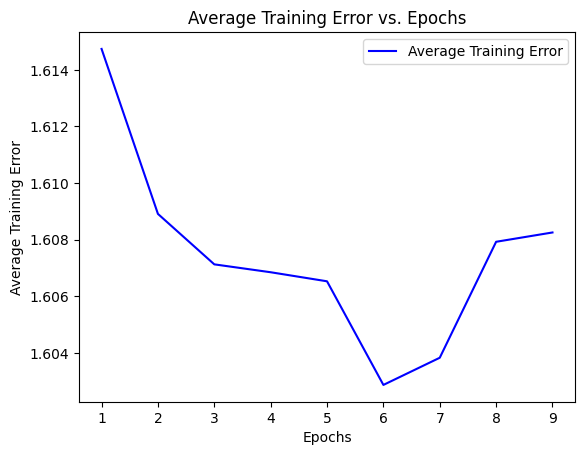

In [ ]:
# Extract the loss values from the history object
training_loss = history01.history['loss']

# Plot the training loss against epochs
epochs = range(1, len(training_loss) + 1)
plt.plot(epochs, training_loss, 'b', label='Average Training Error')
plt.xlabel('Epochs')
plt.ylabel('Average Training Error')
plt.title('Average Training Error vs. Epochs')
plt.legend()
#plt.savefig("E:/Nandani_D22180/DeepLearning/CV_DATA/save_model/RNN_CV1LEE.png")
plt.show()

In [ ]:
model01 = Sequential()
model01.add(SimpleRNN(1024,activation='relu',input_shape=(161, 2), return_sequences=True))
model01.add(Dropout(0.2))
model01.add(SimpleRNN(100))
#model01.add(LSTM(200))


#model3.add(LSTM(100, batch_input_shape=(64,32, 1),stateful=True))
#model3.add(LSTM(100,return_sequences=True))
#model3.add(LSTM(100,batch_input_shape=(64,32, 1),return_sequences=True,stateful=True))
#model3.add(LSTM(100))
#model3.add(Dropout(0.3))
#mode3.add(Dense(7,activation='softmax')) #7 class classification 
#model01.add(Dense(100,activation='relu'))
model01.add(Dense(5,activation='softmax'))
model01.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_8 (SimpleRNN)    (None, 161, 1024)         1051648   
                                                                 
 dropout_6 (Dropout)         (None, 161, 1024)         0         
                                                                 
 simple_rnn_9 (SimpleRNN)    (None, 100)               112500    
                                                                 
 dense_8 (Dense)             (None, 5)                 505       
                                                                 
Total params: 1,164,653
Trainable params: 1,164,653
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model01.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics = ['accuracy'])
history01=model01.fit(tensortrain, yt, epochs=500,batch_size=128,callbacks=[es], verbose=1)

Epoch 1/500
3/3 [==============================] - 21s 7s/step - loss: 1.6487 - accuracy: 0.1565
Epoch 2/500
3/3 [==============================] - 14s 5s/step - loss: 1.6088 - accuracy: 0.1739
Epoch 3/500
3/3 [==============================] - 14s 5s/step - loss: 1.6011 - accuracy: 0.2203
Epoch 4/500
3/3 [==============================] - 14s 5s/step - loss: 1.5976 - accuracy: 0.2348
Epoch 5/500
3/3 [==============================] - 14s 5s/step - loss: 1.5920 - accuracy: 0.2232
Epoch 6/500
3/3 [==============================] - 14s 5s/step - loss: 1.5845 - accuracy: 0.2551
Epoch 7/500
3/3 [==============================] - 15s 5s/step - loss: 1.5671 - accuracy: 0.2957
Epoch 8/500
3/3 [==============================] - 14s 5s/step - loss: 1.5743 - accuracy: 0.2870
Epoch 9/500
3/3 [==============================] - 14s 5s/step - loss: 1.5708 - accuracy: 0.2754
Epoch 10/500
3/3 [==============================] - 14s 5s/step - loss: 1.5677 - accuracy: 0.2754
Epoch 10: early stopping


In [ ]:
model01 = Sequential()
model01.add(SimpleRNN(1024,activation='relu',input_shape=(161, 2), return_sequences=True))
model01.add(Dropout(0.2))
model01.add(SimpleRNN(100,  return_sequences=True))
model01.add(Dropout(0.2))
model01.add(SimpleRNN(100))
model01.add(Dense(5,activation='softmax'))
model01.summary()

model01.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics = ['accuracy'])
history01=model01.fit(tensortrain, yt, epochs=500,batch_size=128,callbacks=[es], verbose=1)

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_19 (SimpleRNN)   (None, 161, 1024)         1051648   
                                                                 
 dropout_12 (Dropout)        (None, 161, 1024)         0         
                                                                 
 simple_rnn_20 (SimpleRNN)   (None, 161, 100)          112500    
                                                                 
 dropout_13 (Dropout)        (None, 161, 100)          0         
                                                                 
 simple_rnn_21 (SimpleRNN)   (None, 100)               20100     
                                                                 
 dense_9 (Dense)             (None, 5)                 505       
                                                                 
Total params: 1,184,753
Trainable params: 1,184,753
N

In [ ]:
model01 = Sequential()
model01.add(SimpleRNN(1024,activation='relu',input_shape=(161, 2), return_sequences=True))
model01.add(Dropout(0.2))
model01.add(SimpleRNN(100,  return_sequences=True))
model01.add(Dropout(0.2))
model01.add(SimpleRNN(100))
model01.add(Dense(5,activation='softmax'))
model01.summary()

model01.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics = ['accuracy'])
history01=model01.fit(tensortrain, yt, epochs=500,batch_size=128,callbacks=[es], verbose=1)